In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.multitest import multipletests

In [2]:
results = pd.read_csv("/data03/christopher/hek293_m6a_clf/m6anet_nanopolish_undersampled_m6ANet_20_prod_sigmoid/probability_per_site.csv.gz")
results["adj_pval"] = multipletests(results["pval"], method='fdr_bh')[1]

In [3]:
results_ko = pd.read_csv("/data03/christopher/hek293_m6a_clf_ko/m6anet_nanopolish_undersampled_m6ANet_20_prod_sigmoid/probability_per_site.csv.gz")
results_ko["adj_pval"] = multipletests(results_ko["pval"], method='fdr_bh')[1]


In [4]:
results_ko

transcript_id  transcript_position   kmer  \
0       ENST00000035307                 3732  GAACT   
1       ENST00000035307                 3545  TGACT   
2       ENST00000035307                 3506  TGACC   
3       ENST00000035307                 2737  AGACT   
4       ENST00000035307                 3470  TGACC   
...                 ...                  ...    ...   
107361  ENST00000640218                 2529  AAACA   
107362  ENST00000640218                 1325  TAACT   
107363  ENST00000640218                 1083  TGACA   
107364  ENST00000640218                 2064  AGACT   
107365  ENST00000640218                 3305  AAACT   

                                                    fpath  n_reads   chr  \
0       /home/christopher/GohGIS_Hek293T_KO_data/ENST0...       28  chr7   
1       /home/christopher/GohGIS_Hek293T_KO_data/ENST0...       24  chr7   
2       /home/christopher/GohGIS_Hek293T_KO_data/ENST0...       23  chr7   
3       /home/christopher/GohGIS_Hek293T_KO_data/ENST0...       21  chr7   
4       /home/christopher/GohGIS_Hek293T_KO_data/ENST0...       23  chr7   
...                                                   ...      ...   ...   
107361  /home/christopher/GohGIS_Hek293T_KO_data/ENST0...       64  chr1   
107362  /home/christopher/GohGIS_Hek293T_KO_data/ENST0...       57  chr1   
107363  /home/christopher/GohGIS_Hek293T_KO_data/ENST0...       53  chr1   
107364  /home/christopher/GohGIS_Hek293T_KO_data/ENST0...       62  chr1   
107365  /home/christopher/GohGIS_Hek293T_KO_data/ENST0...       42  chr1   

                gene_id  genomic_position  m6ACE  miCLIP  modification_status  \
0       ENSG00000033100         151238582      0       0                    0   
1       ENSG00000033100         151238395      0       0                    0   
2       ENSG00000033100         151238356      0       0                    0   
3       ENSG00000033100         151237587      0       0                    0   
4       ENSG00000033100         151238320      0       0                    0   
...                 ...               ...    ...     ...                  ...   
107361  ENSG00000153187         244855476      0       0                    0   
107362  ENSG00000153187         244859296      0       0                    0   
107363  ENSG00000153187         244862484      0       0                    0   
107364  ENSG00000153187         244856534      0       0                    0   
107365  ENSG00000153187         244853852      0       0                    0   

        site_probability          pval  cluster_probability_low  \
0               0.619715  9.030762e-19                 0.003821   
1               0.358857  8.915398e-16                 0.002119   
2               0.307653  2.721313e-11                 0.001708   
3               0.386279  3.824664e-07                 0.001724   
4               0.117728  4.904475e-06                 0.000083   
...                  ...           ...                      ...   
107361          0.081826  2.480040e-10                 0.000150   
107362          0.253047  0.000000e+00                      NaN   
107363          0.189224  3.949932e-02                 0.000654   
107364          0.136714  2.950753e-09                 0.000614   
107365          0.284091  3.397676e-10                 0.001472   

        cluster_probability_high  cluster_probability_all  \
0                       0.097199                 0.044907   
1                       0.045331                 0.022861   
2                       0.035792                 0.016705   
3                       0.049931                 0.022453   
4                       0.013698                 0.006074   
...                          ...                      ...   
107361                  0.005607                 0.003806   
107362                       NaN                 0.013320   
107363                  0.018588                 0.014104   
107364                  0.015503                

In [5]:
features = ["gene_id", "genomic_position", 
            "transcript_id", "transcript_position", 
            "site_probability_wt", "site_probability_ko_100"]
shared_results = results.merge(results_ko, left_on=["gene_id", "genomic_position", "transcript_id", "transcript_position"], 
                               right_on=["gene_id", "genomic_position", "transcript_id", "transcript_position"], 
                               suffixes=["_wt", "_ko_100"],
                              )[features]

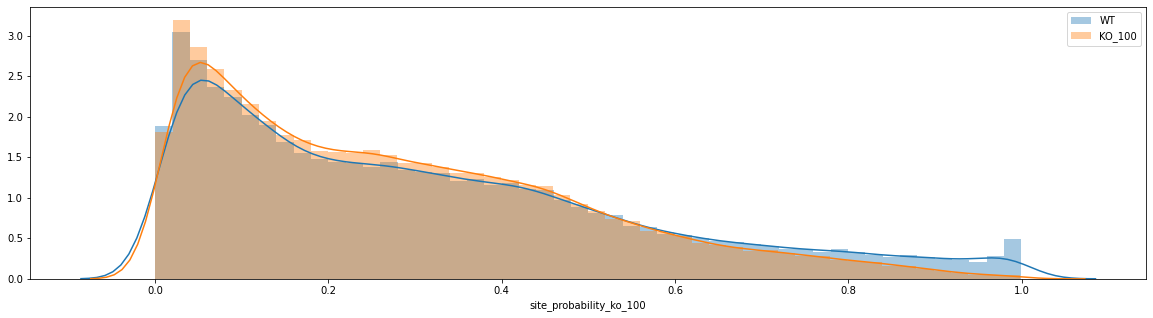

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(20, 5), sharex=True, sharey=True)
sns.distplot(shared_results["site_probability_wt"], ax=ax, label='WT')
sns.distplot(shared_results["site_probability_ko_100"], ax=ax, label='KO_100')
plt.legend()

Zooming in into those positions that are sensitive to KO

In [7]:
ko_table = pd.read_csv("/data03/christopher/wt_ko_hek293_ttest/ttest_results.csv.gz")
ko_table["adj_pval"] = multipletests(ko_table["pvalue"], method='fdr_bh')[1]
shared_results = shared_results.merge(ko_table, how='left', on=['gene_id', 'genomic_position'])
shared_results = shared_results[~shared_results["adj_pval"].isna()]

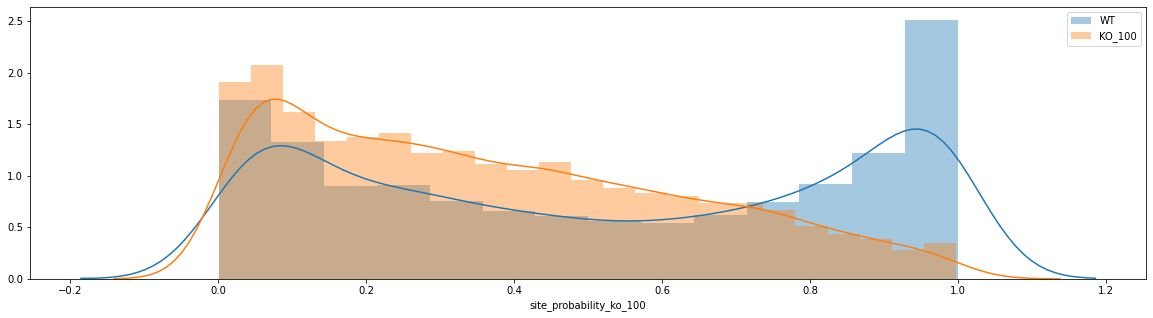

In [8]:
shared_results_filtered = shared_results[~shared_results["adj_pval"].isna()]
shared_results_filtered = shared_results_filtered[shared_results_filtered["adj_pval"] < 0.05]

fig, ax = plt.subplots(1, 1, figsize=(20, 5), sharex=True, sharey=True)
sns.distplot(shared_results_filtered["site_probability_wt"], ax=ax, label='WT')
sns.distplot(shared_results_filtered["site_probability_ko_100"], ax=ax, label='KO_100')
plt.legend()

Expanding our investigation into those positions with varying degree of KO percentage

In [9]:
results_ko_75 = pd.read_csv("/data03/christopher/hek293_m6a_clf_ko_75/m6anet_nanopolish_undersampled_m6ANet_20_prod_sigmoid/probability_per_site.csv.gz")
results_ko_50 = pd.read_csv("/data03/christopher/hek293_m6a_clf_ko_50/m6anet_nanopolish_undersampled_m6ANet_20_prod_sigmoid/probability_per_site.csv.gz")
results_ko_25 = pd.read_csv("/data03/christopher/hek293_m6a_clf_ko_25/m6anet_nanopolish_undersampled_m6ANet_20_prod_sigmoid/probability_per_site.csv.gz")


In [10]:
results_ko_75 = results_ko_75.rename({'site_probability': 'site_probability_ko_75'}, axis=1)
results_ko_50 = results_ko_50.rename({'site_probability': 'site_probability_ko_50'}, axis=1)
results_ko_25 = results_ko_25.rename({'site_probability': 'site_probability_ko_25'}, axis=1)

In [11]:
shared_results_all = shared_results.merge(results_ko_75, 
                                          on=["gene_id", "genomic_position", "transcript_id", "transcript_position"],
                                          suffixes=["_wt", "_ko"])
shared_results_all = shared_results_all.merge(results_ko_50, on=["gene_id", "genomic_position", "transcript_id", "transcript_position"])
shared_results_all = shared_results_all.merge(results_ko_25, on=["gene_id", "genomic_position", "transcript_id", "transcript_position"])

In [12]:
shared_results_all.shape

(46950, 47)

In [13]:
shared_results_filtered = shared_results_all[~shared_results_all["adj_pval"].isna()]
shared_results_filtered = shared_results_filtered[shared_results_filtered["adj_pval"] < 0.05]

fig, ax = plt.subplots(1, 1, figsize=(20, 5), sharex=True, sharey=True)
sns.distplot(shared_results_filtered["site_probability_wt"], ax=ax, label='WT')
sns.distplot(shared_results_filtered["site_probability_ko_25"], ax=ax, label='KO_25')
sns.distplot(shared_results_filtered["site_probability_ko_50"], ax=ax, label='KO_50')
sns.distplot(shared_results_filtered["site_probability_ko_75"], ax=ax, label='KO_75')
sns.distplot(shared_results_filtered["site_probability_ko_100"], ax=ax, label='KO_100')


plt.legend()

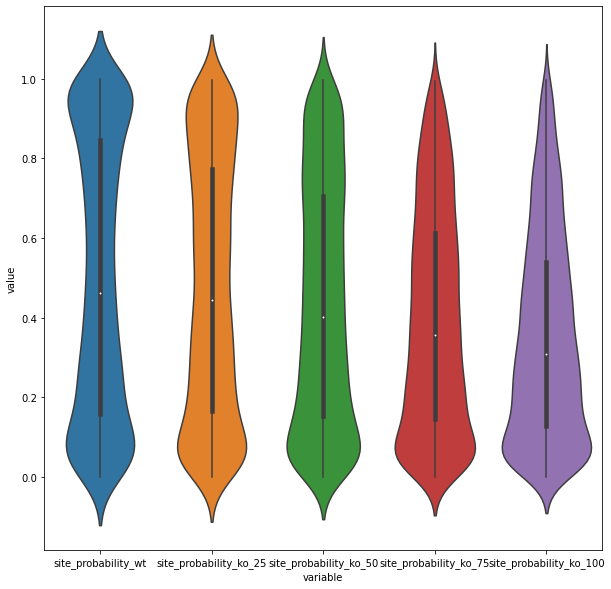

In [14]:
shared_results_filtered_melt = pd.melt(shared_results_filtered, value_vars=["site_probability_wt", "site_probability_ko_100",
                                                                            "site_probability_ko_25", "site_probability_ko_50",
                                                                            "site_probability_ko_75"], )
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
sns.violinplot(x="variable", y="value", data=shared_results_filtered_melt,
               order=["site_probability_wt", "site_probability_ko_25", 
                      "site_probability_ko_50", "site_probability_ko_75","site_probability_ko_100"],
               ax=ax)


Seems like there is a lot of noise near the low-end values, let us try filtering for highly confident positions only

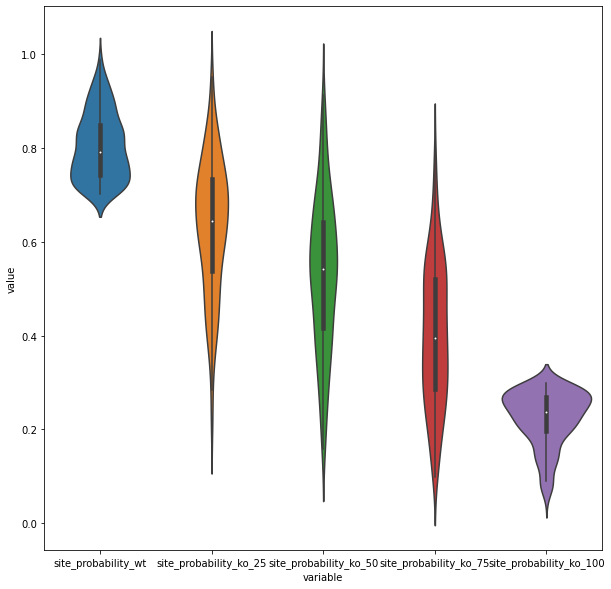

In [15]:
keys = ["gene_id", "genomic_position", "transcript_id", "transcript_position"]
proba_cols = ["site_probability_wt"] + ["site_probability_ko_{}".format(i) for i in (25, 50, 75, 100)]

confidence_mask = (shared_results["site_probability_wt"] >= 0.7) & (shared_results["site_probability_ko_100"] < 0.3)

shared_results_confident = shared_results[confidence_mask]
shared_results_confident = shared_results_confident.merge(results_ko_75, 
                                          on=keys)
shared_results_confident = shared_results_confident.merge(results_ko_50, on=keys)
shared_results_confident = shared_results_confident.merge(results_ko_25, on=keys)

shared_results_confident_melt = pd.melt(shared_results_confident, value_vars=["site_probability_wt",
                                                                              "site_probability_ko_25", 
                                                                              "site_probability_ko_50",
                                                                              "site_probability_ko_75", 
                                                                              "site_probability_ko_100"])
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
sns.violinplot(x="variable", y="value", data=shared_results_confident_melt,
               order=["site_probability_wt", "site_probability_ko_25", 
                      "site_probability_ko_50", "site_probability_ko_75","site_probability_ko_100"],
               ax=ax)


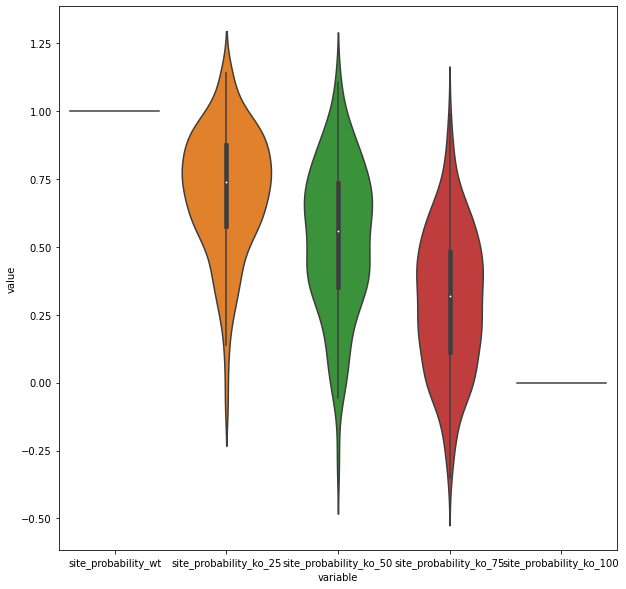

In [16]:
keys = ["gene_id", "genomic_position", "transcript_id", "transcript_position"]
proba_cols = ["site_probability_wt"] + ["site_probability_ko_{}".format(i) for i in (25, 50, 75, 100)]

confidence_mask = (shared_results["site_probability_wt"] >= 0.7) & (shared_results["site_probability_ko_100"] < 0.3)

shared_results_confident = shared_results[confidence_mask]
shared_results_confident = shared_results_confident.merge(results_ko_75, 
                                          on=keys)
shared_results_confident = shared_results_confident.merge(results_ko_50, on=keys)
shared_results_confident = shared_results_confident.merge(results_ko_25, on=keys)

shared_results_confident[proba_cols] = shared_results_confident[proba_cols] - shared_results_confident["site_probability_ko_100"].values.reshape(-1, 1)
shared_results_confident[proba_cols] = shared_results_confident[proba_cols] / shared_results_confident["site_probability_wt"].values.reshape(-1, 1)

shared_results_confident_melt = pd.melt(shared_results_confident, value_vars=["site_probability_wt",
                                                                              "site_probability_ko_25", 
                                                                              "site_probability_ko_50",
                                                                              "site_probability_ko_75", 
                                                                              "site_probability_ko_100"])
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
sns.violinplot(x="variable", y="value", data=shared_results_confident_melt,
               order=["site_probability_wt", "site_probability_ko_25", 
                      "site_probability_ko_50", "site_probability_ko_75","site_probability_ko_100"],
               ax=ax)


Let's try to perform feature selection based on xPORE

In [18]:
cols = ["id", "position", "kmer", "mod_rate_HEK293T-KO-rep1", 
        "mod_rate_HEK293T-WT-rep1",
        "pval_HEK293T-KO_vs_HEK293T-WT"]
diffmod_table = pd.read_csv("/data03/christopher/GohGIS_Hek293T/diffmod.table", usecols=cols)

pval_mask = multipletests(diffmod_table["pval_HEK293T-KO_vs_HEK293T-WT"])[1] < 0.05
mod_rate_wt_mask = diffmod_table["mod_rate_HEK293T-WT-rep1"] > 0.7
mod_rate_ko_mask = diffmod_table["mod_rate_HEK293T-KO-rep1"] < 0.3

diffmod_table_filtered = diffmod_table[pval_mask & mod_rate_wt_mask & mod_rate_ko_mask]

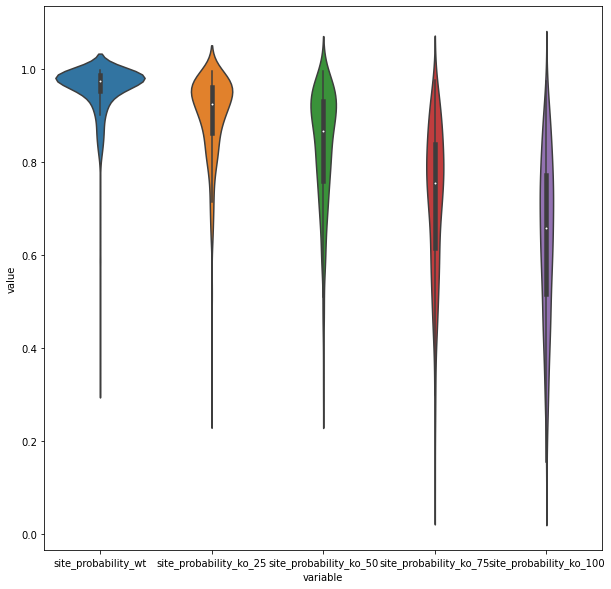

In [19]:
keys = ["gene_id", "genomic_position", "transcript_id", "transcript_position"]
proba_cols = ["site_probability_wt"] + ["site_probability_ko_{}".format(i) for i in (25, 50, 75)] + ["site_probability_ko_100"]

shared_results_confident_xpore = shared_results_all.merge(diffmod_table_filtered, right_on=["id", "position"],
                                                      left_on=["gene_id", "genomic_position"])


shared_results_confident_melt_xpore = pd.melt(shared_results_confident_xpore, value_vars=["site_probability_wt", 
                                                                                          "site_probability_ko_100",
                                                                            "site_probability_ko_25", "site_probability_ko_50",
                                                                            "site_probability_ko_75"], )
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
sns.violinplot(x="variable", y="value", data=shared_results_confident_melt_xpore,
               order=["site_probability_wt", "site_probability_ko_25", 
                      "site_probability_ko_50", "site_probability_ko_75","site_probability_ko_100"],
               ax=ax, show_extrema=False)




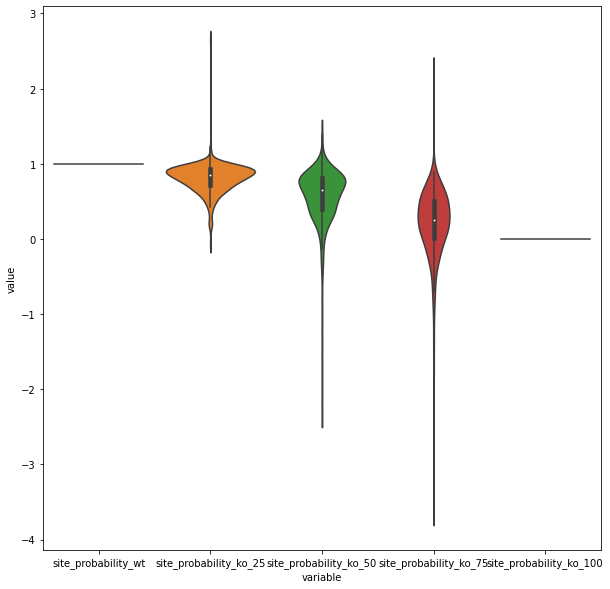

In [20]:
shared_results_confident_xpore[proba_cols] = shared_results_confident_xpore[proba_cols] - \
    shared_results_confident_xpore["site_probability_ko_100"].values.reshape(-1, 1)
shared_results_confident_xpore[proba_cols] = shared_results_confident_xpore[proba_cols] / \
    shared_results_confident_xpore["site_probability_wt"].values.reshape(-1, 1)
shared_results_confident_melt_xpore = pd.melt(shared_results_confident_xpore, value_vars=["site_probability_wt", 
                                                                                          "site_probability_ko_100",
                                                                            "site_probability_ko_25", "site_probability_ko_50",
                                                                            "site_probability_ko_75"], )
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
sns.violinplot(x="variable", y="value", data=shared_results_confident_melt_xpore,
               order=["site_probability_wt", "site_probability_ko_25", 
                      "site_probability_ko_50", "site_probability_ko_75","site_probability_ko_100"],
               ax=ax, show_extrema=False)
